In [2]:
%matplotlib inline

# Mental Rotation Task Data

To get more practice with Numpy, let's analyze some psychological data!  In this experiment, people responded as quickly and accurately as they could, whether two objects on the screen, if built in real life, would be identical or not.  They did this by imaging rotations between the two, a task called "Mental Rotation".  

Here are three examples of trials in this task:

![Mental Rotation Image](https://seop.illc.uva.nl/entries///mental-imagery/shepmetz.gif)

## Loading the Data

Read in each of the txt files in the data folder using the **np.genfromtxt()** function and use them to answer the following questions about the results of the Mental Rotation psychology experiment. If you reach the end of the exercises, explore the dataset more and see what you can find about this experiment!

## Trial-Level Analysis

For each of these files, each value represents a single trial of a single session.  Let's look at these trials and learn more about them!

### Correct
The correct.txt file contains data on whether the that trial was answered correctly or not.

Load the data as a numpy array.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = (pd.read_csv('https://raw.githubusercontent.com/nickdelgrosso/Intro-to-Python-Course/master/Day4_Abstraction/data/MentalRotation.csv'))
df

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M
...,...,...,...,...,...,...,...,...,...
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F


How many trials are in this dataset?

In [5]:
df.shape

(5071, 9)

What unique "correct" values are present in this dataset?  What do you think each each of these values represents?

How many trials were answered correctly?  How many incorrectly?

What percentage of trials were answered correctly?

Make a bar plot showing the number of correct trials and incorrect trials in the experiment.

### Response Time
The time.txt file contains data on how much time it took the participant to respond to that trial (in milliseconds)

Load the data as a numpy array.

How many trials are in this dataset?

What is the average response time?

Plot the distribution of response times as a histogram.

What percentage of trials had response times longer than 1500 milliseconds?

### Matching
The matching.txt file contains data on whether the two objects in the trial were a match (when rotated) or were not a match (no matter how much rotation was done).

Load the data as a numpy array.

How many trials are in this dataset?

What unique "matching" values are present in this dataset?  What do you think each each of these values represents?

How many trials were matching?  How many not matching?

What percentage of trials were matching?

Make a bar plot showing the number of correct trials and incorrect trials in the experiment.

### Angle
The angle.txt file contains data on how much the two objects in the trial were rotated from each other (whether they matched or not).

Load the data as a numpy array.

How many trials are in this dataset?

What unique "angle" values are present in this dataset?  

How many trials were of each angle?

Make a bar plot showing the number of trials for each rotation angle.

## Interactions Between Trial-Level Variables

The most interesting findings come from looking at the relationships between multiple variables.  Let's see if we can find any notable ones!

### Matching x Correct

Plot the percentage of correct trials for **matching** and **non-matching** trials.  Was there a difference between the two?

In [6]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


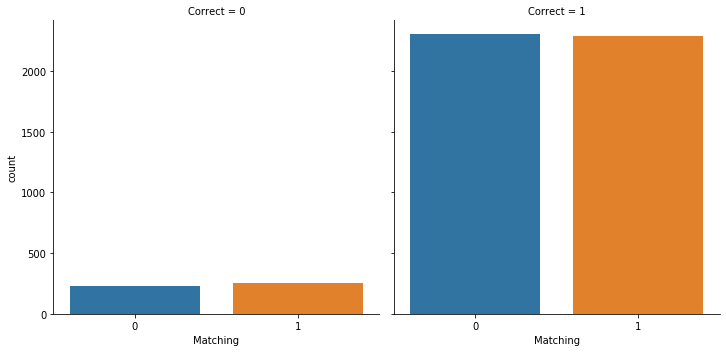

In [7]:
sns.catplot('Matching', col= 'Correct', data = df, kind='count');

How many correct and incorrect trials were there for matching trials?  How many of each for non-matching trials?

In [9]:
test = df.groupby('Correct')['Time']

### Matching x Response Time

Plot the distribution of response times for **matching** and **non-matching** trials.  Was there a difference in response time between the two conditions?

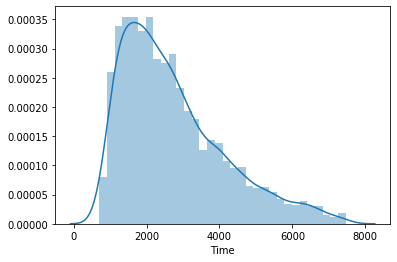

In [10]:
sns.distplot(df['Time']);

### Angle x Response Time

Plot the distribution of response times for trials of each rotation angle.  Was there a difference in response time between each condition?  Is there a relationship between rotation angle and response time?

In [11]:
import matplotlib.pyplot as plt

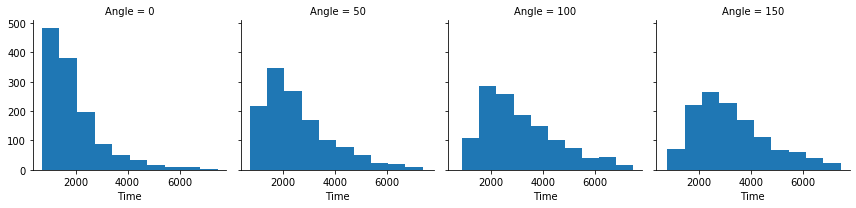

In [12]:
g = sns.FacetGrid(df,col='Angle')
g = g.map(plt.hist,'Time')

### Angle x Correct

Plot the mean percentage correct for trials of each rotation angle.  Was there a difference in response time between each condition?  Is there a relationship between rotation angle and response time?

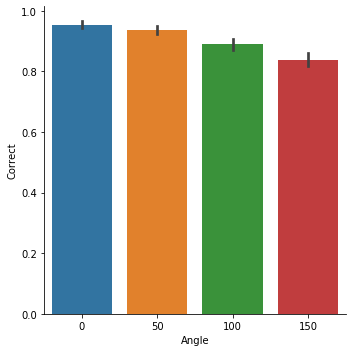

In [13]:
g = sns.catplot(data = df, x='Angle', y='Correct', kind ='bar', estimator =np.mean)

### Angle x Response Time

Plot the distribution of response times for trials of each rotation angle.  Was there a difference in response time between each condition?  Is there a relationship between rotation angle and response time?

### Matching x Angle x Response Time

Plot the mean response time for each angle, seperated by whether the trial was matching or not. Was there a difference in response time between each condition?  Is there a different relationship between rotation angle and response time for matching and non-matching trials?

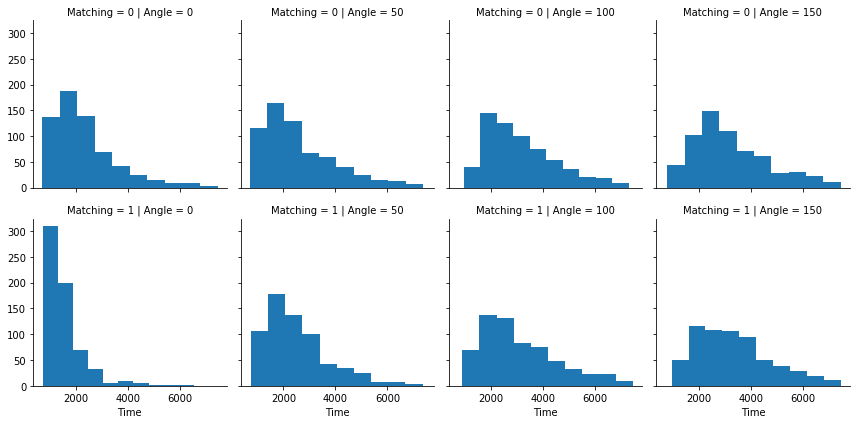

In [14]:
g = sns.FacetGrid(df,col='Angle', row = 'Matching')
g = g.map(plt.hist,'Time')

## Subject-Level Analysis

There are also variables in this dataset that represent "groupings" of data.  In this case, there is the fact that different people participated in the study.  We always need to take into account the fact that each individual person is different, if we are to learn more about the general pattern of data.  Let's look at the different groups and get a feel for it.

### Subject IDs
The subject.txt file contains the subject id number for each trial of the experiment.

Load the data as a numpy array.

What unique subject id values are present in this dataset?

In [15]:
np.unique(df['Subject'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

How many unique subjects (participants in the experiment) are present in this dataset?

In [16]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


How many trials did each subject perform?

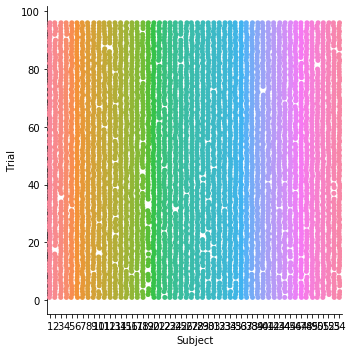

In [17]:
sns.catplot(data=df, x='Subject',y='Trial',kind ='strip', estimator = np.max)

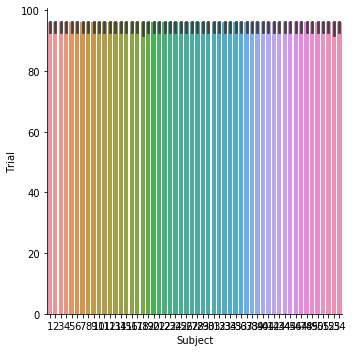

In [18]:
sns.catplot(data = df, x='Subject', y='Trial', kind ='bar', estimator =np.max)

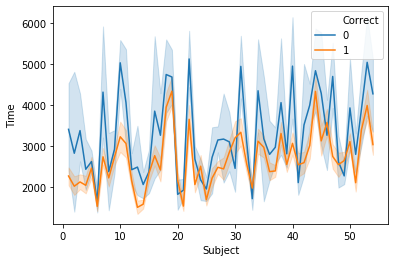

In [19]:
sns.lineplot(data = df, x = 'Subject', y='Time', hue='Correct')

### Age

Load the data as a numpy array.

In [20]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


What unique age values are present in this dataset?

In [21]:
np.unique(df['Age'])

array([18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33],
      dtype=int64)

What is the mean age of the subjects? 

In [22]:
df['Age'].mean()

22.31197002563597

Plot the distribution of ages as a histogram

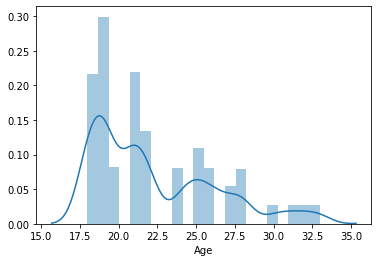

In [23]:
sns.distplot(df['Age'])

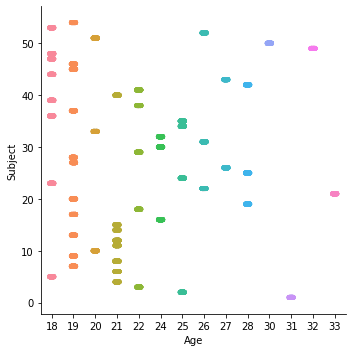

In [24]:
sns.catplot(data=df, x='Age', y='Subject')

### Sex

Load the data as a numpy array.

In [25]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


What unique sex values are present in this dataset?

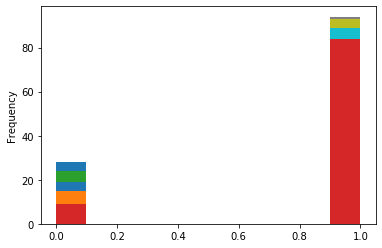

In [26]:
df.groupby('Subject')['Correct'].plot.hist();

How many subjects of each sex participated in this experiment?

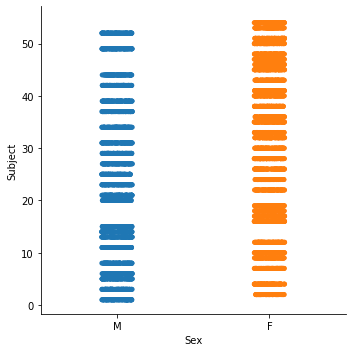

In [27]:
sns.catplot(data = df, x = 'Sex', y = 'Subject')

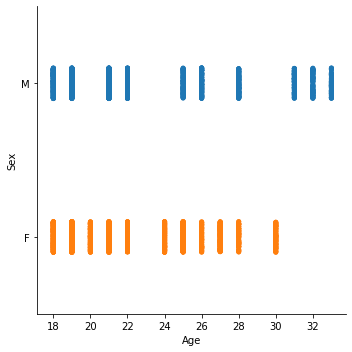

In [28]:
sns.catplot(data=df, x='Age', y = 'Sex')

In [29]:
subj_list = np.unique(df['Subject'])
subj_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [30]:
df_subj = (df[['Subject', 'Sex', 'Age']]
         .set_index('Subject'))
df_subj.head()

,Sex,Age
Subject,,
49,M,32
49,M,32
49,M,32
49,M,32
49,M,32


In [31]:
trial_dict = dict()
for subj in subj_list:
    trial_dict[subj] = df_subj.loc[subj].shape[0]
df_trial = (pd.DataFrame(list(trial_dict.items()),
                   columns = ['Subject','Trials'])
            .set_index('Subject')
           )
df_trial.head()

,Trials
Subject,
1,96
2,93
3,94
4,95
5,95


In [32]:
df_subj

,Sex,Age
Subject,,
49,M,32
49,M,32
49,M,32
49,M,32
49,M,32
...,...,...
33,F,20
33,F,20
33,F,20


In [33]:
df_new = (pd.merge(left = df_trial, right = df_subj,
                 left_on = 'Subject', right_on = 'Subject')
            .reset_index()
            .drop_duplicates()
            )
df_new.head()

,Subject,Trials,Sex,Age
0,1,96,M,31
96,2,93,F,25
189,3,94,M,22
283,4,95,F,21
378,5,95,M,18


## df_new 
has now just the information related to the subjects such as subject number, number of trials, sex and age.

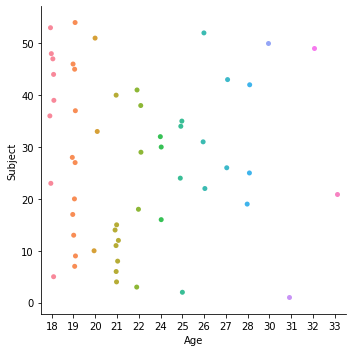

In [34]:
sns.catplot(data = df_new, x = 'Age', y='Subject');

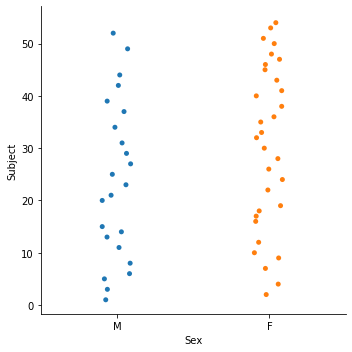

In [35]:
sns.catplot(data = df_new, x = 'Sex', y = 'Subject')

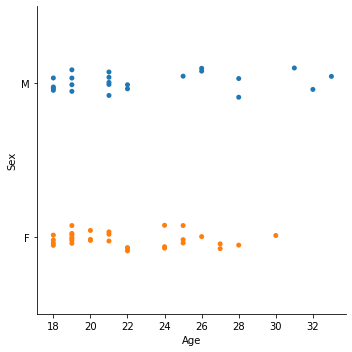

In [36]:
sns.catplot(data=df_new, x = 'Age',y='Sex');

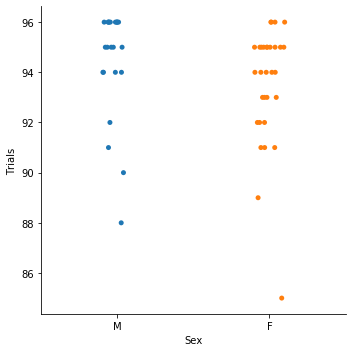

In [37]:
sns.catplot(data= df_new, x ='Sex', y ='Trials')

## (Optional) Further Analysis: Subject-Level and Trial-Level interactions

Explore the dataset, looking for more relationships between variables.  For example, did the subject's age relate to their response times?  What about their sex?  Who in the experiment was the most accurate?  Did that person also have the fastest response times?  By relating different variables together, a wide variety of questions can be generated.